In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/BAAC_MASTER_2019_2024.csv",sep=";",low_memory=False, encoding='utf-8')
df.head()


,num_acc,actp,an_nais,annee,catu,etatp,grav,id_usager,id_vehicule,locp,...,pr,pr1,prof,situ,surf,v1,v2,vma,voie,vosp
0,201900000001,-1,2002.0,2019,2,-1,4,NaN,138306524,-1,...,6,900,1,1,1,0.0,NaN,70,3,0
1,201900000001,-1,1993.0,2019,1,-1,4,NaN,138306524,-1,...,6,900,1,1,1,0.0,NaN,70,3,0
2,201900000001,-1,1959.0,2019,1,-1,1,NaN,138306525,-1,...,6,900,1,1,1,0.0,NaN,70,3,0
3,201900000002,-1,1994.0,2019,1,-1,4,NaN,138306523,-1,...,3,845,4,1,1,0.0,NaN,70,1,0
4,201900000003,0,1996.0,2019,1,-1,1,NaN,138306520,-1,...,10,500,1,1,1,0.0,NaN,90,86,0


In [5]:
df.shape

(820413, 58)

In [6]:
df.dtypes

num_acc           int64
actp             object
an_nais         float64
annee             int64
catu              int64
etatp             int64
grav              int64
id_usager       float64
id_vehicule       int64
locp              int64
num_veh_usag     object
place             int64
secu1             int64
secu2             int64
secu3             int64
sexe              int64
trajet            int64
catv              int64
choc              int64
manv              int64
motor             int64
num_veh_veh      object
obs               int64
obsm              int64
occutc          float64
senc              int64
accident_id     float64
adr              object
agg             float64
an              float64
atm             float64
col             float64
com              object
dep              object
hrmn             object
int             float64
jour            float64
lat              object
long             object
lum             float64
mois            float64
catr            

In [7]:
df.columns

Index(['num_acc', 'actp', 'an_nais', 'annee', 'catu', 'etatp', 'grav',
       'id_usager', 'id_vehicule', 'locp', 'num_veh_usag', 'place', 'secu1',
       'secu2', 'secu3', 'sexe', 'trajet', 'catv', 'choc', 'manv', 'motor',
       'num_veh_veh', 'obs', 'obsm', 'occutc', 'senc', 'accident_id', 'adr',
       'agg', 'an', 'atm', 'col', 'com', 'dep', 'hrmn', 'int', 'jour', 'lat',
       'long', 'lum', 'mois', 'catr', 'circ', 'infra', 'larrout', 'lartpc',
       'nbv', 'plan', 'pr', 'pr1', 'prof', 'situ', 'surf', 'v1', 'v2', 'vma',
       'voie', 'vosp'],
      dtype='object')

### DISTRIBUTION DE LA GRAVITÉ DES ACCIDENTS

In [8]:
print(">> Répartition de la gravité des blessures (en %)")
print((df["grav"].value_counts(normalize=True) * 100).round(2).sort_index())

print("\n>> Répartition de la gravité (en effectifs)")
print(df["grav"].value_counts().sort_index())

>> Répartition de la gravité des blessures (en %)
grav
-1     0.06
 1    42.45
 2     2.55
 3    15.04
 4    39.90
Name: proportion, dtype: float64

>> Répartition de la gravité (en effectifs)
grav
-1       457
 1    348299
 2     20880
 3    123399
 4    327378
Name: count, dtype: int64


On supprime pour les accidents non renseignés

In [9]:
df = df[df["grav"] != -1]

# Étude des valeurs manquantes

In [10]:
df.isna().sum().sort_values(ascending=False)

accident_id     819956
lartpc          819161
occutc          808146
v2              753049
nbv             367460
id_usager       238272
adr             140708
larrout         132977
jour            126421
long            126421
lat             126421
an              126421
mois            126421
agg             126421
int             126421
atm             126421
col             126421
com             126421
lum             126421
dep             126421
hrmn            126421
voie            105300
v1               24596
an_nais          12456
catr                 0
circ                 0
plan                 0
pr                   0
pr1                  0
prof                 0
situ                 0
surf                 0
vma                  0
infra                0
num_acc              0
actp                 0
secu2                0
annee                0
catu                 0
etatp                0
grav                 0
id_vehicule          0
locp                 0
num_veh_usa

In [22]:
df.isna().mean()*100

num_acc           0.000000
actp              0.000000
an_nais           1.573841
annee             0.000000
catu              0.000000
etatp             0.000000
grav              0.000000
id_usager        29.042933
id_vehicule       0.000000
locp              0.000000
num_veh_usag      0.000000
place             0.000000
secu1             0.000000
secu2             0.000000
secu3             0.000000
sexe              0.000000
trajet            0.000000
catv              0.000000
choc              0.000000
manv              0.000000
motor             0.000000
num_veh_veh       0.000000
obs               0.000000
obsm              0.000000
occutc           98.559872
senc              0.000000
accident_id     100.000000
adr              17.180737
agg              15.438809
an               15.438809
atm              15.438809
col              15.438809
com              15.438809
dep              15.438809
hrmn             15.438809
int              15.438809
jour             15.438809
l

On supprime les données dont les valeurs manquantes en moyenne sont supérieures à 90%

In [11]:
#  - créer presence_bande_cyclable = 1 si lartpc renseignée, 0 sinon
#  - supprimer lartpc
#  - supprimer v2
#  - supprimer voie
# -----------------------------
# Création indicateur bande/piste cyclable
if "lartpc" in df.columns:
    df["presence_bande_cyclable"] = df["lartpc"].notna().astype(int)
    df = df.drop(columns=["lartpc"])

# Suppression variables très manquantes / textuelles
cols_to_drop_df = [c for c in ["v2", "voie"] if c in df.columns]
if len(cols_to_drop_df) > 0:
    df = df.drop(columns=cols_to_drop_df)

In [12]:
# Suppression de la variable texte "adr" (peu exploitable + valeurs manquantes)
if "adr" in df.columns:
    df = df.drop(columns=["adr"])

In [13]:
# Décisions :
#  - transformer an_nais -> age
#  - corriger années incohérentes (optionnel mais recommandé)
#  - imputer age manquant par la médiane
#  - supprimer an_nais après création de age
# -----------------------------
CURRENT_YEAR = 2024 #dernier jeu de données
if "an_nais" in df.columns:
    # Convertir en numérique (au cas où)
    df["an_nais"] = pd.to_numeric(df["an_nais"], errors="coerce")

    # Remplacer les années incohérentes par NaN (seuils simples et défendables)
    df.loc[(df["an_nais"] < 1900) | (df["an_nais"] > CURRENT_YEAR), "an_nais"] = np.nan

    # Créer l'âge (approx)
    df["age"] = CURRENT_YEAR - df["an_nais"]

    # Imputation de l'âge par la médiane (sur l'ensemble)
    age_median = df["age"].median()
    df["age"] = df["age"].fillna(age_median)

    # supprimer an_nais (on garde uniquement age pour le ML)
    df = df.drop(columns=["an_nais"])

In [14]:
# Décision : supprimer occutc
# -----------------------------
if "occutc" in df.columns:
    df = df.drop(columns=["occutc"])

# Vérification des outliers

In [15]:
# 2) Détection d'outliers sur variables numériques (IQR)
num_cols = df.select_dtypes(include="number").columns

outlier_rows = []
for col in num_cols:
    s = df[col].dropna()
    # On ignore les colonnes constantes ou trop pauvres
    if s.nunique() <= 1:
        continue
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        continue
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    n_out = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_rows.append((col, int(n_out), round(100 * n_out / df.shape[0], 3)))

outliers = pd.DataFrame(outlier_rows, columns=["variable", "n_outliers", "pct_outliers"]).sort_values(
    by="n_outliers", ascending=False
)

print("\nOutliers (IQR) – variables numériques :")
print(outliers if len(outliers) > 0 else "Aucun outlier détecté (selon IQR) ou pas de variables numériques pertinentes.")



Outliers (IQR) – variables numériques :
       variable  n_outliers  pct_outliers
12         catv      236413        28.832
9         secu2      174792        21.317
24         catr      120124        14.650
8         secu1      114611        13.978
7         place      102628        12.516
6          locp       55290         6.743
25          vma       46148         5.628
20          int       37417         4.563
15         obsm       14939         1.822
13         choc       12544         1.530
10         sexe       11828         1.443
16         senc        1921         0.234
26          age         879         0.107
1         annee           0         0.000
14         manv           0         0.000
11       trajet           0         0.000
5   id_vehicule           0         0.000
17          agg           0         0.000
18           an           0         0.000
19          col           0         0.000
4     id_usager           0         0.000
21         jour           0        

In [16]:
print("=== df : vérif 'vma' ===")
print(df["vma"].describe())

print("\nValeurs les plus fréquentes :")
print(df["vma"].value_counts(dropna=False).head(20))

print("\nValeurs suspectes (ex: <=0 ou >130) :")
print("<=0 :", (df["vma"] <= 0).sum())
print(">130 :", (df["vma"] > 130).sum())

print("\nExemples de valeurs >130 :")
print(df.loc[df["vma"] > 130, ["num_acc", "vma"]].head(10))

=== df : vérif 'vma' ===
count    819956.000000
mean         58.453551
std          26.474095
min          -1.000000
25%          50.000000
50%          50.000000
75%          80.000000
max         901.000000
Name: vma, dtype: float64

Valeurs les plus fréquentes :
vma
 50     397431
 80     108579
 30     106204
 90      63902
 70      58844
 110     30780
-1       25760
 130     19826
 20       2324
 60       1963
 10       1317
 40        739
 25        409
 15        400
 5         306
 45        249
 100       194
 1         157
 500       146
 2         121
Name: count, dtype: int64

Valeurs suspectes (ex: <=0 ou >130) :
<=0 : 25764
>130 : 225

Exemples de valeurs >130 :
            num_acc  vma
10061  201900004475  500
10062  201900004475  500
38092  201900016900  500
38093  201900016900  500
40776  201900018073  500
40777  201900018073  500
40778  201900018073  500
41528  201900018414  560
41529  201900018414  560
41530  201900018414  560


In [17]:
print("=== CARACERISTIQUES : vérif modalités 'int' ===")
print("Nb modalités distinctes :", df["int"].nunique())
print("Top modalités :")
print(df["int"].value_counts(dropna=False).head(20).sort_index())

print("\nMin/Max (pour détecter valeurs absurdes) :")
print("min:", df["int"].min(), "max:", df["int"].max())

=== CARACERISTIQUES : vérif modalités 'int' ===
Nb modalités distinctes : 10
Top modalités :
int
-1.0        12
 1.0    394161
 2.0    111036
 3.0     97653
 4.0     18262
 5.0      4917
 6.0     30077
 7.0      6782
 8.0      1569
 9.0     29066
 NaN    126421
Name: count, dtype: int64

Min/Max (pour détecter valeurs absurdes) :
min: -1.0 max: 9.0


In [18]:
print("=== vérif 'vma' ===")
print(df["vma"].describe())

print("\nValeurs les plus fréquentes :")
print(df["vma"].value_counts(dropna=False).head(20))

print("\nValeurs suspectes (ex: <=0 ou >130) :")
print("<=0 :", (df["vma"] <= 0).sum())
print(">130 :", (df["vma"] > 130).sum())

print("\nExemples de valeurs >130 :")
print(df.loc[df["vma"] > 130, ["num_acc", "vma"]].head(10))

=== vérif 'vma' ===
count    819956.000000
mean         58.453551
std          26.474095
min          -1.000000
25%          50.000000
50%          50.000000
75%          80.000000
max         901.000000
Name: vma, dtype: float64

Valeurs les plus fréquentes :
vma
 50     397431
 80     108579
 30     106204
 90      63902
 70      58844
 110     30780
-1       25760
 130     19826
 20       2324
 60       1963
 10       1317
 40        739
 25        409
 15        400
 5         306
 45        249
 100       194
 1         157
 500       146
 2         121
Name: count, dtype: int64

Valeurs suspectes (ex: <=0 ou >130) :
<=0 : 25764
>130 : 225

Exemples de valeurs >130 :
            num_acc  vma
10061  201900004475  500
10062  201900004475  500
38092  201900016900  500
38093  201900016900  500
40776  201900018073  500
40777  201900018073  500
40778  201900018073  500
41528  201900018414  560
41529  201900018414  560
41530  201900018414  560


In [19]:
print("===  contrôles de cohérence (codes) ===")
for c in ["secu1", "secu2", "place", "locp", "sexe"]:
    print(f"\n--- {c} ---")
    print("nunique:", df[c].nunique(dropna=False))
    print("top modalités:")
    print(df[c].value_counts(dropna=False).head(15))

print("\n=== df : vérif age (après transformation) ===")
print(df["age"].describe())
print("Age <0 :", (df["age"] < 0).sum())
print("Age >110 :", (df["age"] > 110).sum())

===  contrôles de cohérence (codes) ===

--- secu1 ---
nunique: 11
top modalités:
secu1
 1    479202
 2    149383
 8    101107
 0     71800
-1     11099
 3      4960
 9       844
 6       730
 4       531
 5       282
 7        18
Name: count, dtype: int64

--- secu2 ---
nunique: 11
top modalités:
secu2
-1    330955
 0    312746
 8     76221
 6     76021
 5      8743
 4      8067
 9      2554
 1      1463
 2      1153
 3      1024
 7      1009
Name: count, dtype: int64

--- place ---
nunique: 11
top modalités:
place
 1     609682
 2      91872
 10     62797
 3      15774
 4      14580
 9       8294
 7       7729
 5       4518
 8       3580
 6       1121
-1          9
Name: count, dtype: int64

--- locp ---
nunique: 11
top modalités:
locp
-1    383652
 0    372235
 3     20387
 2     13632
 4     10533
 1      8779
 5      4973
 9      3016
 6      1812
 8       870
 7        67
Name: count, dtype: int64

--- sexe ---
nunique: 3
top modalités:
sexe
 1    551793
 2    256335
-1     11828

In [20]:
print("===  contrôles de cohérence ===")
for c in ["catv", "choc", "obsm", "senc", "manv"]:
    print(f"\n--- {c} ---")
    print("nunique:", df[c].nunique(dropna=False))
    print("top modalités:")
    print(df[c].value_counts(dropna=False).head(15))


===  contrôles de cohérence ===

--- catv ---
nunique: 32
top modalités:
catv
7     512688
10     57549
33     55547
1      37882
2      26492
30     21339
32     15915
50     14633
31     12466
37      8425
34      7726
15      6229
14      5333
3       4971
80      4548
Name: count, dtype: int64

--- choc ---
nunique: 11
top modalités:
choc
 1    299812
 3    123849
 2    107051
 4     76680
 8     53995
 7     48072
 0     47059
 6     27620
 5     22901
 9     12544
-1       373
Name: count, dtype: int64

--- obsm ---
nunique: 8
top modalités:
obsm
 2    534950
 0    151541
 1    118526
 9     11529
 6      1642
 4       820
 5       618
-1       330
Name: count, dtype: int64

--- senc ---
nunique: 5
top modalités:
senc
 1    365996
 2    277014
 3    125462
 0     49563
-1      1921
Name: count, dtype: int64

--- manv ---
nunique: 28
top modalités:
manv
1     349174
2      85336
15     70254
0      48742
13     33261
26     26883
17     25356
16     23936
9      23625
19     21364

In [21]:
# ---  traitement vma (sans NaN) ---
# Règle : vma == -1 ou vma > 130 -> imputation par la médiane des valeurs plausibles

vma_valid = df.loc[(df["vma"] > 0) & (df["vma"] <= 130), "vma"]
vma_median = vma_valid.median()

df.loc[df["vma"] <= 0, "vma"] = vma_median      # inclut -1
df.loc[df["vma"] > 130, "vma"] = vma_median

print("vma_median utilisée :", vma_median)
print("Nb valeurs <=0 après :", (df["vma"] <= 0).sum())
print("Nb valeurs >130 après :", (df["vma"] > 130).sum())

vma_median utilisée : 50.0
Nb valeurs <=0 après : 0
Nb valeurs >130 après : 0


In [22]:
def replace_minus_one_with_mode_valid(df, cols, label):
    print(f"=== {label} : remplacement -1 par mode (hors -1) ===")
    for c in cols:
        if c not in df.columns:
            continue
        # Si pas de -1, on ne fait rien
        n_minus1 = (df[c] == -1).sum() if pd.api.types.is_numeric_dtype(df[c]) else 0
        if n_minus1 == 0:
            continue

        # Mode sur valeurs valides (≠ -1)
        valid = df.loc[df[c] != -1, c]
        if valid.shape[0] == 0:
            continue  # cas extrême (tout est -1)

        mode_valid = valid.mode(dropna=True)
        if mode_valid.empty:
            continue

        fill_value = mode_valid.iloc[0]
        df.loc[df[c] == -1, c] = fill_value
        print(f"{c}: -1={n_minus1} -> remplacé par {fill_value}")

# Colonnes à traiter (ajuste si tu veux)
cols= ["sexe", "secu1", "secu2", "secu3", "place", "locp", "actp", "etatp", "trajet","choc", "obsm", "senc", "obs", "manv", "catv", "motor"]

replace_minus_one_with_mode_valid(df, col, "Traitement")



=== Traitement : remplacement -1 par mode (hors -1) ===


## Carte des accidents

In [23]:
# pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/54/e4/fac19dc34cb686c96011388b813ff7b858a70681e5ce6ce7698e5021b0f4/geopandas-1.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/34/97/e8f2ed8a339152b86f8403c258ae5d5f23ab32d690eeb0545bb3473d0c69/pyogrio-0.12.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.5.0 from https://files.pythonhosted.org/packages/79/e0/b95584605cec9ed50b7ebaf7975d1c4ddeec5a86b7a20554ed8b60042bd7/pyproj-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/38/1e/3f8ea46353c2a33c1669eb7327f9665103aa3a8dfe7f2e4ef714c210b2c2/shapely-2.1.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/341.7 kB ? eta -:--:--
   -------- ------------------------------- 71.7/341.7 kB 2.0 MB/s eta 0:00:01
   

In [ ]:
# pip install contextily

  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/6a/bb/6c824d0da874eef900ecf0a71e0889f0d4624560b0160fd9e333a146ee4f/contextily-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for mercantile from https://files.pythonhosted.org/packages/b2/d6/de0cc74f8d36976aeca0dd2e9cbf711882ff8e177495115fd82459afdc4d/mercantile-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/66/d0/3818859ddbd3750d0ef5a6580a3272e81764286d943c689dd41e49b8b786/rasterio-1.4.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/31/b3/802576f2ea5dcb48501bb162e4c7b7b3ca5654a42b2c968ef98a797a4c79/geographicl

In [26]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz

In [27]:
# forcer en string
df["lat"] = df["lat"].astype(str)
df["long"] = df["long"].astype(str)

# remplacer virgule par point
df["lat"] = df["lat"].str.replace(",", ".", regex=False)
df["long"] = df["long"].str.replace(",", ".", regex=False)

# convertir en numérique
df["lat"] = pd.to_numeric(df["lat"], errors="coerce")
df["long"] = pd.to_numeric(df["long"], errors="coerce")
df = df.dropna(subset=["lat","long"])

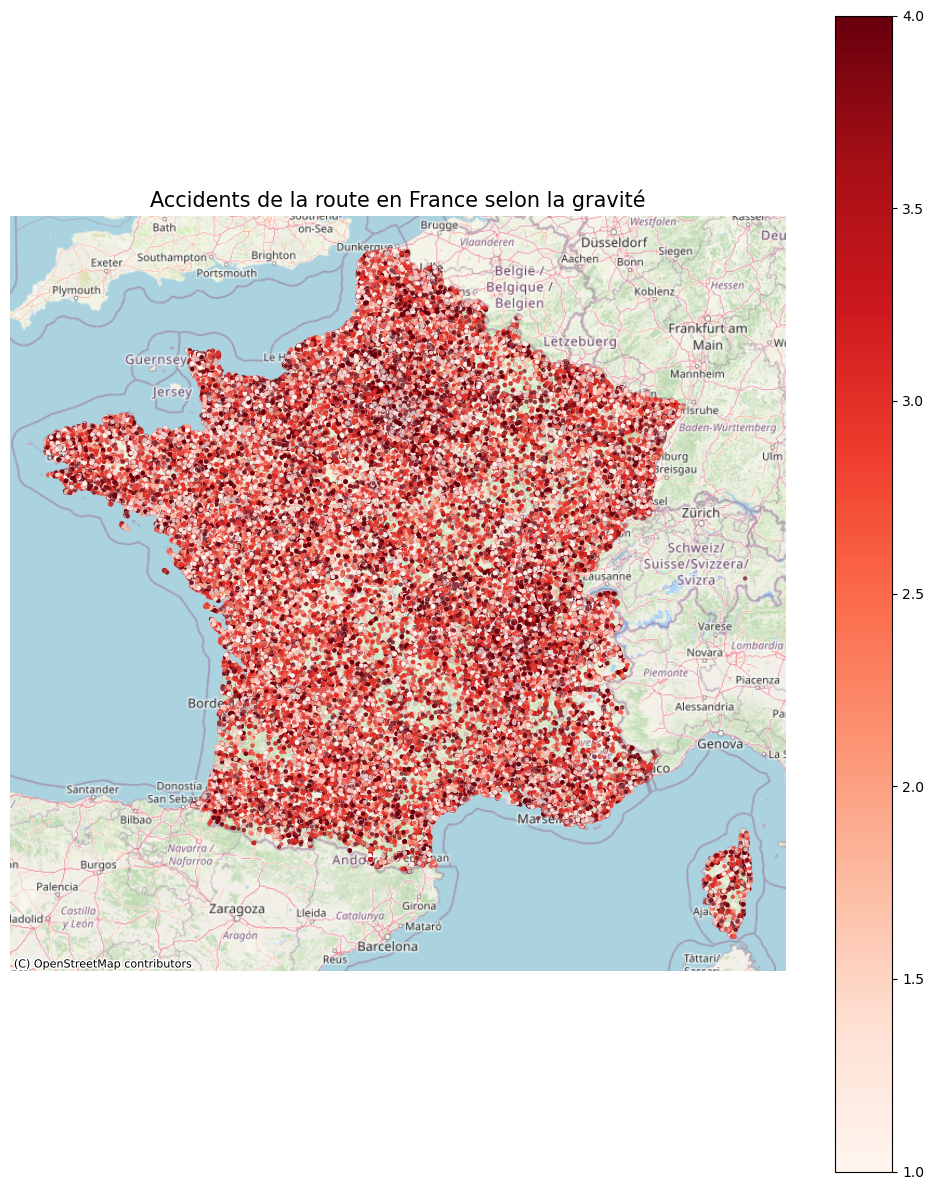

In [28]:
# --- 3. Filtrer la France métropolitaine ---
df = df[(df["lat"] >= 41) & (df["lat"] <= 51)]
df = df[(df["long"] >= -5) & (df["long"] <= 10)]

# --- 4. Créer GeoDataFrame ---
geometry = [Point(xy) for xy in zip(df["long"], df["lat"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Reprojection pour fond OSM (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# --- 5. Plot carte ---
fig, ax = plt.subplots(figsize=(10,12))
gdf.plot(ax=ax, column="grav", cmap="Reds", markersize=5, alpha=0.6, legend=True)

# Ajouter fond de carte OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# --- 6. Ajuster figure et axes ---
ax.set_axis_off()
plt.tight_layout()
plt.title("Accidents de la route en France selon la gravité", fontsize=15)
plt.show()

# Feature Engineering 
## 1. Définition de la variable cible (gravité au niveau accident)

Avant de construire la table finale (1 ligne = 1 accident), il est indispensable de **définir précisément la variable cible** que l’on souhaite prédire.

Dans la table `df`, la variable `grav` correspond à la **gravité de blessure de l’usager**. Cette variable est codée (valeurs discrètes) et peut prêter à confusion si l’on ne vérifie pas sa signification.

D’après la documentation officielle ONISR (BAAC — *Description des bases de données annuelles*), on a :

- `grav = 1` : **Indemne**
- `grav = 2` : **Tué**
- `grav = 3` : **Blessé hospitalisé**
- `grav = 4` : **Blessé léger**

Source : ONISR — *Description des bases de données annuelles* (document de référence du fichier BAAC).

### Choix métier pour la cible

L’objectif métier du projet est d’identifier rapidement, dès l’appel aux secours et/ou à l’arrivée des premiers intervenants, si un accident présente une gravité élevée.

Ainsi, nous définissons un accident comme **grave** si au moins un usager est :
- **tué** (`grav = 2`) ou
- **blessé hospitalisé** (`grav = 3`)

Autrement dit, la cible binaire au niveau accident est :

- `grav_acc = 1` si ∃ usager avec `grav ∈ {2,3}`
- `grav_acc = 0` sinon (indemnes et/ou blessés légers uniquement)

Avant de figer cette définition, nous vérifions la cohérence avec les données (répartition de `grav` et proportion d’accidents graves obtenue selon plusieurs règles).


In [29]:
# ============================================================
# 4. Feature Engineering — Définition & vérification de la cible
# ============================================================

# import pandas as pd

print("=== Vérification de la variable grav (table df) ===")

# 1) Distribution de grav au niveau usager
grav_counts = df["grav"].value_counts(dropna=False).sort_index()
grav_pct = df["grav"].value_counts(normalize=True, dropna=False).mul(100).round(2).sort_index()

print("\nDistribution de grav (df) :")
print(grav_counts)
print("\nEn % :")
print(grav_pct)

# 2) Distribution de grav_max par accident (permet de voir la 'gravité max' observée dans chaque accident)
grav_max = df.groupby("num_acc")["grav"].max()
grav_max_counts = grav_max.value_counts().sort_index()
grav_max_pct = grav_max.value_counts(normalize=True).mul(100).round(2).sort_index()

print("\nDistribution de grav_max par accident :")
print(grav_max_counts)
print("\nEn % :")
print(grav_max_pct)

# 3) Comparaison de plusieurs définitions possibles de "accident grave"
#    (utile pour vérifier qu'une règle ne rend pas 95% des accidents "graves" par erreur de codage)
print("\n=== Tests de définitions (taux d'accidents graves en %) ===")

grav_list_per_acc = df.groupby("num_acc")["grav"].apply(list)

def taux_grave(cond):
    return grav_list_per_acc.apply(cond).mean() * 100

tests = {
    "grave si grav in {2,3} (tué ou hospitalisé)" : lambda L: any(g in [2, 3] for g in L),
    "grave si grav in {2} (tué)"                  : lambda L: any(g == 2 for g in L),
    "grave si grav in {3} (hospitalisé)"          : lambda L: any(g == 3 for g in L),
}

for name, fn in tests.items():
    print(f"{name} : {taux_grave(fn):.2f}")

# Définition finale retenue (métier) : grave = tué ou hospitalisé
print("\n=== Définition retenue pour la cible ===")
print("grav_acc = 1 si au moins un usager a grav ∈ {2,3}, sinon 0")

=== Vérification de la variable grav (table df) ===

Distribution de grav (df) :
grav
1    278396
2     16032
3     97410
4    262946
Name: count, dtype: int64

En % :
grav
1    42.52
2     2.45
3    14.88
4    40.16
Name: proportion, dtype: float64

Distribution de grav_max par accident :
grav
2      9979
3     64661
4    182547
Name: count, dtype: int64

En % :
grav
2     3.88
3    25.14
4    70.98
Name: proportion, dtype: float64

=== Tests de définitions (taux d'accidents graves en %) ===
grave si grav in {2,3} (tué ou hospitalisé) : 35.41
grave si grav in {2} (tué) : 5.52
grave si grav in {3} (hospitalisé) : 30.80

=== Définition retenue pour la cible ===
grav_acc = 1 si au moins un usager a grav ∈ {2,3}, sinon 0


In [30]:
# Creation de la variable cible

df["is_grave_usager"] = df["grav"].isin([2, 3]).astype(int)

target_acc = (
    df.groupby("num_acc")["is_grave_usager"]
    .max()
    .reset_index()
    .rename(columns={"is_grave_usager": "grav_acc"})
)

print("\nRépartition de grav_acc (accidents) :")
print(target_acc["grav_acc"].value_counts())
print("\nEn % :")
print(target_acc["grav_acc"].value_counts(normalize=True).mul(100).round(2))


Répartition de grav_acc (accidents) :
grav_acc
0    166129
1     91058
Name: count, dtype: int64

En % :
grav_acc
0    64.59
1    35.41
Name: proportion, dtype: float64


## 2.  Agrégations des usagers (niveau accident)
Objectif : construire des variables réalistes et disponibles rapidement (témoignage / premiers secours), au niveau accident (1 ligne = 1 accident).

Nous ne conservons pas des statistiques trop fines (âge moyen, médiane, etc.) car elles sont peu réalistes à connaître immédiatement. À la place, nous construisons des indicateurs simples :

* nombre total d'df impliqués
* nombre d'hommes / femmes
* présence de piéton
* présence d'enfant (âge < 14)
* présence de senior (âge ≥ 65)
Avant cela, on vérifie rapidement le codage de catu (catégorie usager) pour identifier la modalité correspondant aux piétons.


In [31]:

# ============================================================
# 5. Agrégations df : vérification du codage + agrégation
# ============================================================

print("=== Vérification du codage de catu (catégorie usager) ===")
print(df["catu"].value_counts(dropna=False).sort_index().head(20))

# IMPORTANT :
# Le code "piéton" peut varier selon le dictionnaire.
# Par défaut, on suppose catu == 3 = piéton (à confirmer avec le dictionnaire ou le prof).
# Si besoin, tu ajusteras la valeur ici :
CATU_PIETON = 3

# Indicateurs simples et "terrain"
df["is_homme"] = (df["sexe"] == 1).astype(int)
df["is_femme"] = (df["sexe"] == 2).astype(int)

df["is_pieton"] = (df["catu"] == CATU_PIETON).astype(int)
df["is_enfant"] = (df["age"] < 14).astype(int)
df["is_senior"] = (df["age"] >= 65).astype(int)

# Agrégation au niveau accident
df_agg1 = df.groupby("num_acc").agg(
    nb_usager=("id_usager", "count"),
    nb_hommes=("is_homme", "sum"),
    nb_femmes=("is_femme", "sum"),
    presence_pieton=("is_pieton", "max"),
    presence_enfant=("is_enfant", "max"),
    presence_senior=("is_senior", "max"),
).reset_index()

print("\n=== Aperçu agrégations df ===")
print(df_agg1.head())

=== Vérification du codage de catu (catégorie usager) ===
catu
1    488554
2    115792
3     50438
Name: count, dtype: int64

=== Aperçu agrégations df ===
        num_acc  nb_usager  nb_hommes  nb_femmes  presence_pieton  \
0  201900000001          0          1          2                0   
1  201900000002          0          0          1                0   
2  201900000003          0          3          1                0   
3  201900000004          0          3          1                0   
4  201900000005          0          3          0                0   

   presence_enfant  presence_senior  
0                0                1  
1                0                0  
2                0                1  
3                0                0  
4                0                0  


## 3. Agrégations des vehicules (niveau accident)
Objectif : décrire rapidement l'accident via des informations plausibles au moment de l'appel :

* nombre de véhicules impliqués
* présence de grandes familles de véhicules (voiture, 2RM, vélo, poids lourd, transport en commun)  

Pour cela, on utilise la variable catv (catégorie de véhicule) et on la regroupe en grandes familles. Comme le mapping dépend du dictionnaire BAAC, on commence par :

1. afficher les valeurs les plus fréquentes de `catv`
2. définir un dictionnaire de mapping simple

In [32]:
# ============================================================
# 6. Agrégations véhicules : nb_df + préparation mapping
# ============================================================

print("=== Top catégories catv ===")
print(df["catv"].value_counts(dropna=False).head(25))

# 1) Nombre de véhicules distincts par accident
df_agg2 = df.groupby("num_acc").agg(
    nb_df=("id_vehicule", "nunique")
).reset_index()

print("\n=== Aperçu nb_df ===")
print(df_agg2.head())

=== Top catégories catv ===
catv
7     409948
10     45725
33     44850
1      31136
2      19908
30     16322
32     12389
50     11826
31      9879
37      6867
34      6132
15      5136
14      4280
3       4074
80      3707
43      3544
17      3400
99      2722
38      2639
13      2350
21      1550
0       1346
60      1283
36      1131
40      1079
Name: count, dtype: int64

=== Aperçu nb_df ===
        num_acc  nb_df
0  201900000001      2
1  201900000002      1
2  201900000003      3
3  201900000004      3
4  201900000005      2


In [33]:
# ============================================================
# Présence de familles de véhicules (mapping OFFICIEL BAAC)
# ============================================================

MAP_CATV_TO_FAM = {
    # Vélo
    "velo": set([1, 80]),

    # 2 roues motorisés (scooters/motos)
    "2rm": set([30, 31, 32, 33, 34]),

    # 3 roues motorisés / quads
    "3rm_quad": set([35, 36, 41, 42, 43]),

    # Véhicules légers (voiture) + utilitaires légers
    "vl_vu": set([7, 10]),

    # Poids lourds / tracteurs routiers
    "pl": set([13, 14, 15, 16, 17]),

    # Transport collectif (bus, autocar, tramway)
    "tc": set([37, 38, 40]),

    # Engins de déplacement personnel
    "edp": set([50, 60]),
}

veh_tmp = df[["num_acc", "id_vehicule", "catv"]].copy()

# Flags par véhicule
veh_tmp["is_velo"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["velo"]).astype(int)
veh_tmp["is_2rm"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["2rm"]).astype(int)
veh_tmp["is_3rm_quad"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["3rm_quad"]).astype(int)
veh_tmp["is_vl_vu"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["vl_vu"]).astype(int)
veh_tmp["is_pl"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["pl"]).astype(int)
veh_tmp["is_tc"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["tc"]).astype(int)
veh_tmp["is_edp"] = veh_tmp["catv"].isin(MAP_CATV_TO_FAM["edp"]).astype(int)

# Agrégation au niveau accident : présence si au moins un véhicule de la famille
veh_fam_agg = veh_tmp.groupby("num_acc").agg(
    presence_velo=("is_velo", "max"),
    presence_2rm=("is_2rm", "max"),
    presence_3rm_quad=("is_3rm_quad", "max"),
    presence_vl_vu=("is_vl_vu", "max"),
    presence_pl=("is_pl", "max"),
    presence_tc=("is_tc", "max"),
    presence_edp=("is_edp", "max"),
).reset_index()

# Merge avec nb_df
df_agg2= df_agg2.merge(veh_fam_agg, on="num_acc", how="left")

print("=== Aperçu df_agg (nb véhicules + familles) ===")
print(df_agg2.head())

print("\nRépartition des présences (en %) :")
cols_presence = [c for c in df_agg2.columns if c.startswith("presence_")]
print((df_agg2[cols_presence].mean().mul(100).round(2)).sort_values(ascending=False))


=== Aperçu df_agg (nb véhicules + familles) ===
        num_acc  nb_df  presence_velo  presence_2rm  presence_3rm_quad  \
0  201900000001      2              0             0                  0   
1  201900000002      1              0             0                  0   
2  201900000003      3              0             0                  0   
3  201900000004      3              0             0                  0   
4  201900000005      2              0             0                  0   

   presence_vl_vu  presence_pl  presence_tc  presence_edp  
0               1            1            0             0  
1               1            0            0             0  
2               1            0            0             0  
3               1            0            0             0  
4               1            0            0             0  

Répartition des présences (en %) :
presence_vl_vu       81.55
presence_2rm         26.02
presence_velo        10.17
presence_pl           4.67
pre

# 4. Agrégation des lieux (niveau accident)

La table `lieux` peut contenir plusieurs lignes par accident.  
On agrège par accident en conservant des variables simples et plausibles rapidement :

- vma (vitesse max) : modalité la plus fréquente (mode)
- nbv (nombre de voies) : mode
- catr, circ, surf : mode
- presence_bande_cyclable : max (présence si au moins une ligne le signale)


In [34]:


# ============================================================
# 7. Agrégation df : mode + max
# ============================================================

def mode_series(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) > 0 else np.nan

df_agg3 = df.groupby("num_acc").agg(
    vma=("vma", mode_series),
    nbv=("nbv", mode_series),
    catr=("catr", mode_series),
    circ=("circ", mode_series),
    surf=("surf", mode_series),
    presence_bande_cyclable=("presence_bande_cyclable", "max"),
).reset_index()

print("=== Aperçu df_agg ===")
print(df_agg3.head())

print("\nNA dans df_agg (top) :")
print(df_agg3.isna().sum().sort_values(ascending=False).head(10))

=== Aperçu df_agg ===
        num_acc  vma  nbv  catr  circ  surf  presence_bande_cyclable
0  201900000001   70  NaN     1     3     1                        0
1  201900000002   70  NaN     1     1     1                        0
2  201900000003   90  NaN     1     3     1                        0
3  201900000004   90  NaN     1     3     1                        0
4  201900000005   90  NaN     1     1     1                        0

NA dans df_agg (top) :
nbv                        154585
num_acc                         0
vma                             0
catr                            0
circ                            0
surf                            0
presence_bande_cyclable         0
dtype: int64


## 5. Caractéristiques des accidents

On conserve uniquement une information géographique générale : `dep` (département).
On dérive des variables temporelles réalistes : heure, jour de semaine, weekend, saison.
On conserve des variables de contexte disponibles rapidement : luminosité, météo, agglomération, intersection, type de collision.

In [35]:


# ============================================================
# FEATURES TEMPORELLES + CONTEXTE
# ============================================================

df_feat = df.copy()

# =========================
# HEURE
# =========================
df_feat["heure"] = (
    pd.to_numeric(
        df_feat["hrmn"].astype(str).str.slice(0, 2),
        errors="coerce"
    )
    .astype("Int64")
)

# =========================
# DATE (doit exister AVANT toute sélection)
# =========================
df_feat["date"] = pd.to_datetime(
    dict(
        year=pd.to_numeric(df_feat["an"], errors="coerce"),
        month=pd.to_numeric(df_feat["mois"], errors="coerce"),
        day=pd.to_numeric(df_feat["jour"], errors="coerce"),
    ),
    errors="coerce"
)

df_feat["jour_semaine"] = df_feat["date"].dt.dayofweek
df_feat["weekend"] = df_feat["jour_semaine"].isin([5, 6]).astype(int)
# =========================
# SAISON
# =========================
def saison(m):
    if m in (12, 1, 2):
        return "hiver"
    elif m in (3, 4, 5):
        return "printemps"
    elif m in (6, 7, 8):
        return "ete"
    else:
        return "automne"

df_feat["saison"] = df_feat["mois"].apply(saison)

# =========================
# SELECTION FINALE (APRES features)
# =========================
df_keep = [
    "num_acc",
    "annee",
    "dep",
    "heure",
    "jour_semaine",
    "weekend",
    "saison",
    "lum",
    "atm",
    "col",
]

df_feat = df_feat[df_keep].copy()

# =========================
# CONTROLES
# =========================
print("Colonnes finales :", df_feat.columns.tolist())
print(df_feat.head())

print("\nNA par colonne :")
print(df_feat.isna().sum().sort_values(ascending=False))


Colonnes finales : ['num_acc', 'annee', 'dep', 'heure', 'jour_semaine', 'weekend', 'saison', 'lum', 'atm', 'col']
        num_acc  annee dep  heure  jour_semaine  weekend   saison  lum  atm  \
0  201900000001   2019  93      1             5        1  automne  4.0  1.0   
1  201900000001   2019  93      1             5        1  automne  4.0  1.0   
2  201900000001   2019  93      1             5        1  automne  4.0  1.0   
3  201900000002   2019  93      2             5        1  automne  3.0  1.0   
4  201900000003   2019  92     15             3        0  automne  1.0  1.0   

   col  
0  2.0  
1  2.0  
2  2.0  
3  6.0  
4  4.0  

NA par colonne :
num_acc         0
annee           0
dep             0
heure           0
jour_semaine    0
weekend         0
saison          0
lum             0
atm             0
col             0
dtype: int64


# Construction de la table finale 

On assemble :
- `carac_feat` (temps + contexte)
- `lieux_agg` (infrastructure simple)
- `usagers_agg` (profils simples)
- `vehicules_agg` (nb véhicules + familles)
- `target_acc` (grav_acc)

Puis on réalise des imputations simples :
- variables `presence_*` : NA -> 0
- variables numériques simples (ex: vma) : NA -> médiane
- variables catégorielles : NA -> mode (ou "Inconnu" si besoin)


In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [37]:
# ============================================================
# 1. Table finale
# ============================================================

df2 = (
    df_feat
    .merge(df_agg1, on="num_acc", how="left")
    .merge(df_agg2, on="num_acc", how="left")
    .merge(df_agg3, on="num_acc", how="left")
    .merge(target_acc, on="num_acc", how="left")
)

print("Doublons num_acc :", df2["num_acc"].duplicated().sum())

# ============================================================
# 2. Imputations métier
# ============================================================

# presence_* -> 0
presence_cols = [c for c in df2.columns if c.startswith("presence_")]
df2[presence_cols] = df2[presence_cols].fillna(0)

# nb_* -> 0
count_cols = [c for c in df2.columns if c.startswith("nb_")]
df2[count_cols] = df2[count_cols].fillna(0)

# vma -> médiane
if "vma" in df2.columns:
    df2["vma"] = df2["vma"].fillna(df2["vma"].median())

# ============================================================
# 3. Variables temporelles (CORRECT)
# ============================================================

# annee (numérique)
df2["annee"] = df2["annee"].fillna(df2["annee"].median())

# heure (cyclique)
df2["heure"] = df2["heure"].fillna(df2["heure"].median())
df2["heure_sin"] = np.sin(2 * np.pi * df2["heure"] / 24)
df2["heure_cos"] = np.cos(2 * np.pi * df2["heure"] / 24)
df2.drop(columns="heure", inplace=True)

# jour_semaine (cyclique)
df2["jour_semaine"] = df2["jour_semaine"].fillna(df2["jour_semaine"].median())
df2["jour_sin"] = np.sin(2 * np.pi * df2["jour_semaine"] / 7)
df2["jour_cos"] = np.cos(2 * np.pi * df2["jour_semaine"] / 7)
df2.drop(columns="jour_semaine", inplace=True)

# ============================================================
# 4. Séparation cible / features
# ============================================================

y = df2["grav_acc"]
X = df2.drop(columns=["grav_acc", "num_acc"])

# ============================================================
# 5. Forcer les catégorielles BAAC
# ============================================================

cat_cols = [
    "dep", "saison", "lum", "atm", "agg", "int",
    "col", "catr", "circ", "surf", "nbv",
    "weekend"
] + presence_cols

for c in cat_cols:
    if c in X.columns:
        X[c] = X[c].astype("category")

# ============================================================
# 6. Séparation auto num / cat
# ============================================================

num_vars = X.select_dtypes(include=["int32","int64", "float64"]).columns.tolist()
cat_vars = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Variables numériques :", num_vars)
print("Variables catégorielles :", cat_vars)

# ============================================================
# 7. Preprocessing pipeline
# ============================================================

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_vars),
        ("cat", categorical_transformer, cat_vars)
    ],
    remainder="drop"
)

# ============================================================
# 8. Checks
# ============================================================

print("\nNA restants (top 15) :")
print(X.isna().sum().sort_values(ascending=False).head(15))

print("\nRépartition grav_acc (%) :")
print(y.value_counts(normalize=True).mul(100).round(2))


Doublons num_acc : 397597
Variables numériques : ['annee', 'nb_usager', 'nb_hommes', 'nb_femmes', 'nb_df', 'vma', 'heure_sin', 'heure_cos', 'jour_sin', 'jour_cos']
Variables catégorielles : ['dep', 'weekend', 'saison', 'lum', 'atm', 'col', 'presence_pieton', 'presence_enfant', 'presence_senior', 'presence_velo', 'presence_2rm', 'presence_3rm_quad', 'presence_vl_vu', 'presence_pl', 'presence_tc', 'presence_edp', 'nbv', 'catr', 'circ', 'surf', 'presence_bande_cyclable']

NA restants (top 15) :
nbv                        347447
annee                           0
presence_3rm_quad               0
jour_sin                        0
heure_cos                       0
heure_sin                       0
presence_bande_cyclable         0
surf                            0
circ                            0
catr                            0
vma                             0
presence_edp                    0
presence_tc                     0
presence_pl                     0
presence_vl_vu             

Les valeurs manquantes apparues après les jointures ont été traitées selon la nature des variables. Les variables binaires de présence (presence_*) ainsi que les variables de comptage (nb_*) ont été imputées à 0, ce choix traduisant l’absence d’un usager, d’un type de véhicule ou d’une caractéristique lorsque l’information n’est pas renseignée dans les tables sources. Les variables numériques continues (telles que l’année ou la vitesse maximale autorisée) ont été imputées par la médiane, une statistique robuste aux valeurs extrêmes, afin de ne pas biaiser la distribution. Enfin, les variables catégorielles ont été imputées par leur modalité la plus fréquente, ce qui permet de conserver une cohérence avec la structure globale des données sans introduire de catégories artificielles. Ces choix, fondés à la fois sur la logique métier des données accidentologiques et sur les bonnes pratiques en apprentissage automatique, permettent d’obtenir un jeu de données complet, cohérent et directement exploitable pour la phase de modélisation.

In [38]:
df2.to_csv("../data/baac_final.csv", index=False)

# Modélisation

1. Préparation à la modélisation

Avant de construire les modèles de prédiction, il est indispensable de préparer correctement les données. Cette étape commence par la séparation entre la variable cible (grav_acc, qui indique si un accident est grave ou non) et les variables explicatives. Ensuite les différentes colonnes du jeu de données sont classées selon leur type (numérique, catégoriel, booléen, date), car chaque type nécessite un traitement spécifique. Cette identification permet de définir une stratégie de prétraitement adaptée : imputation des valeurs manquantes, normalisation des variables numériques et encodage des variables catégorielles. L’ensemble de ces transformations est ensuite regroupé dans un ColumnTransformer garantissant un pipeline propre, reproductible et compatible avec les modèles de machine learning utilisés par la suite.

In [39]:

# ============================================================
# 1. Séparer cible et variables explicatives
# ============================================================

y = df2["grav_acc"]
X = df2.drop(columns=["grav_acc", "num_acc"])



# 2) Forcer les variables codées BAAC à être catégorielles (même si elles sont en int)
# (Ces colonnes sont des codes -> pas des valeurs numériques continues)
code_cols = ["lum", "atm", "agg", "int", "col", "catr", "circ", "surf", "nbv", "dep", "saison"]
for c in code_cols:
    if c in X.columns:
        X[c] = X[c].astype("category")

print("Variables numériques (scalées) :", num_vars)
print("Variables catégorielles (OneHot) :", cat_vars)


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_vars),
        ("cat", categorical_transformer, cat_vars)
    ],
    remainder="drop"
)

preprocessor


Variables numériques (scalées) : ['annee', 'nb_usager', 'nb_hommes', 'nb_femmes', 'nb_df', 'vma', 'heure_sin', 'heure_cos', 'jour_sin', 'jour_cos']
Variables catégorielles (OneHot) : ['dep', 'weekend', 'saison', 'lum', 'atm', 'col', 'presence_pieton', 'presence_enfant', 'presence_senior', 'presence_velo', 'presence_2rm', 'presence_3rm_quad', 'presence_vl_vu', 'presence_pl', 'presence_tc', 'presence_edp', 'nbv', 'catr', 'circ', 'surf', 'presence_bande_cyclable']


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['annee', 'nb_usager', 'nb_hommes',
                                  'nb_femmes', 'nb_df', 'vma', 'heure_sin',
                                  'heure_cos', 'jour_sin', 'jour_cos']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['dep', 'weekend', 'saison', 'lum', 'atm',
                                  'col', 'presence_pieton', 'presence_enfant',
                                  'presence_senior', 'presence_velo',
                                  'presence_2rm', 'presence_3rm_quad',
                                  'presence_vl_vu', 'presence_pl',
                                  'presence_tc', 'presence_edp', 'nbv', 'catr',
                                  'circ', 'surf', 'presence_bande_cyclable'])])

Avant l’entraînement des modèles, les données ont été séparées en deux ensembles distincts selon un critère temporel. Les accidents survenus entre 2019 et 2023 ont été utilisés comme ensemble d’entraînement, tandis que les données de l’année 2024 ont été réservées comme ensemble de test. Ce découpage chronologique permet d’évaluer les performances du modèle sur des données réellement futures par rapport à celles utilisées pour l’apprentissage, et constitue ainsi une approche plus réaliste de la capacité de généralisation du modèle. Il évite par ailleurs toute fuite d’information temporelle et reflète les conditions réelles d’utilisation du modèle. La distribution de la variable cible a été vérifiée afin de s’assurer que les proportions d’accidents graves et non graves restent comparables entre les deux ensembles, condition nécessaire à une évaluation fiable dans un contexte de classes modérément déséquilibrées.

In [40]:

# Split
df_train = df2[df2["annee"] < 2024].copy()
df_test  = df2[df2["annee"] == 2024].copy()


target = "grav_acc"

X_train = df_train.drop(columns=[target])
y_train = df_train[target]

X_test = df_test.drop(columns=[target])
y_test = df_test[target]



Afin de garantir une démarche rigoureuse et reproductible, chaque modèle de machine learning est intégré dans un pipeline combinant le prétraitement des données et l’algorithme de classification. Cette approche permet d’appliquer automatiquement les mêmes transformations (imputation, normalisation, encodage) lors de l’entraînement et lors de la prédiction, ce qui limite les risques de fuite d’information.

Dans cette version du projet, nous adoptons un découpage temporel : les années antérieures à 2024 constituent l’ensemble d’entraînement, et l’année 2024 est conservée comme ensemble de test. Ce choix permet d’évaluer la capacité du modèle à généraliser sur une année “future”, ce qui est plus réaliste d’un point de vue opérationnel.

Compte tenu du volume important du jeu de données, un sous-échantillon de l’entraînement est utilisé pour accélérer la recherche d’hyperparamètres. La cohérence de la distribution de la variable cible entre l’échantillon et l’ensemble d’entraînement est vérifiée afin de conserver un comportement comparable du modèle.

Une recherche d’hyperparamètres est ensuite menée via GridSearchCV (validation croisée sur l’ensemble d’entraînement), avec une métrique orientée métier : le rappel (recall) de la classe “grave” (1), afin de limiter les faux négatifs. Enfin, les modèles optimisés sont évalués sur l’ensemble de test 2024 pour comparer leurs performances de manière équitable.

In [41]:

# ============================================================
# 0. ÉCHANTILLONNAGE (pour accélérer)
# ============================================================

N_SAMPLE = 30000  

X_train_small = X_train.sample(n=N_SAMPLE, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

# ============================================================
# 1. Pipelines
# ============================================================

pipe_logreg = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

pipe_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1))
])

pipe_gb = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

# ============================================================
# 2. Paramètres
# ============================================================

param_logreg = {
    "classifier__C": [0.1, 1]
}

param_rf = {
    "classifier__n_estimators": [50],
    "classifier__max_depth": [10]
}

param_gb = {
    "classifier__n_estimators": [100],
    "classifier__learning_rate": [0.1]
}

# ============================================================
# 3. GridSearchCV
# ============================================================

grids = {
    "Logistic Regression": GridSearchCV(pipe_logreg, param_logreg, cv=3, scoring="recall", n_jobs=-1, verbose=1),
    "Random Forest": GridSearchCV(pipe_rf, param_rf, cv=3, scoring="recall", n_jobs=-1, verbose=1),
    "Gradient Boosting": GridSearchCV(pipe_gb, param_gb, cv=3, scoring="recall", n_jobs=-1, verbose=1)
}

results = {}

for name, grid in grids.items():
    print(f"\n Entraînement du modèle : {name}")
    grid.fit(X_train_small, y_train_small)
    results[name] = grid

# ============================================================
# 4. Évaluation sur le vrai X_test (pas échantillonné)
# ============================================================

for name, grid in results.items():
    print(f"\n=== {name} ===")
    print("Meilleurs hyperparamètres :", grid.best_params_)
    y_pred = grid.predict(X_test)
    print(classification_report(y_test, y_pred))



 Entraînement du modèle : Logistic Regression
Fitting 3 folds for each of 2 candidates, totalling 6 fits

 Entraînement du modèle : Random Forest
Fitting 3 folds for each of 1 candidates, totalling 3 fits

 Entraînement du modèle : Gradient Boosting
Fitting 3 folds for each of 1 candidates, totalling 3 fits

=== Logistic Regression ===
Meilleurs hyperparamètres : {'classifier__C': 1}
              precision    recall  f1-score   support

           0       0.79      0.85      0.82    101710
           1       0.65      0.54      0.59     51332

    accuracy                           0.75    153042
   macro avg       0.72      0.70      0.71    153042
weighted avg       0.74      0.75      0.74    153042


=== Random Forest ===
Meilleurs hyperparamètres : {'classifier__max_depth': 10, 'classifier__n_estimators': 50}
              precision    recall  f1-score   support

           0       0.74      0.92      0.82    101710
           1       0.71      0.37      0.49     51332

    accu

In [50]:
print("Distrib train :", y_train.value_counts(normalize=True).round(4).to_dict())
print("Distrib sample:", y_train_small.value_counts(normalize=True).round(4).to_dict())

Distrib train : {0: 0.6594, 1: 0.3406}
Distrib sample: {0: 0.66, 1: 0.34}



=== Matrice de confusion : Logistic Regression ===


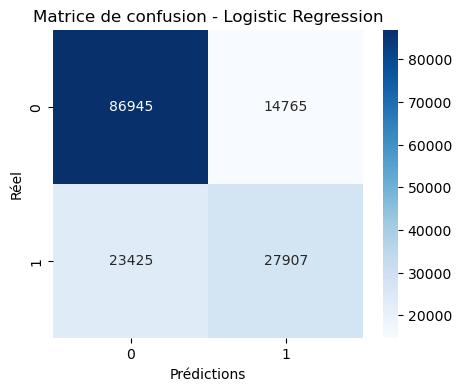


=== Matrice de confusion : Random Forest ===


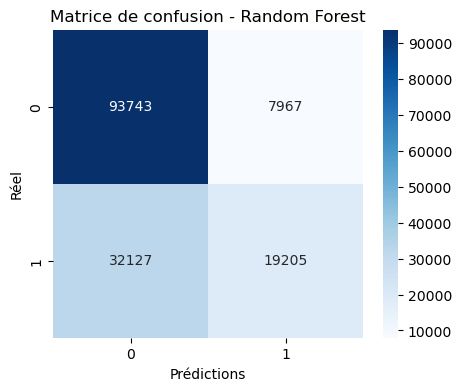


=== Matrice de confusion : Gradient Boosting ===


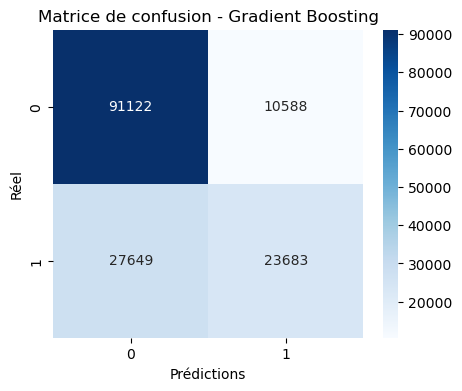

In [47]:
#***Matrice de confusion
for name, grid in results.items():
    print(f"\n=== Matrice de confusion : {name} ===")
    y_pred = grid.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Réel")
    plt.show()

In [42]:
#***ROC-AUC
for name, grid in results.items():
    # Probabilité d'appartenir à la classe 1
    y_proba = grid.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"{name} - ROC-AUC :", auc)

Logistic Regression - ROC-AUC : 0.7972834668599199
Random Forest - ROC-AUC : 0.7803281078740172
Gradient Boosting - ROC-AUC : 0.7974202290792385


Le score ROC-AUC mesure la capacité des modèles à distinguer les deux classes indépendamment du seuil de décision. Il s’appuie sur les probabilités prédites et évalue la qualité du classement produit par le modèle (1 = très bon, 0,5 = aléatoire).

Sur notre test 2024, les scores obtenus sont :
- Régression Logistique : ROC-AUC ≈ 0,797
- Random Forest : ROC-AUC ≈ 0,780
- Gradient Boosting : ROC-AUC ≈ 0,797

Ces valeurs indiquent que la Régression Logistique et le Gradient Boosting produisent un classement de qualité similaire, légèrement supérieur au Random Forest. Le ROC-AUC étant indépendant du seuil, il confirme qu’un ajustement du seuil peut être pertinent pour améliorer le rappel sur la classe grave.

In [44]:
#***Analyse des faux négatifs car les plus critiques
for name, grid in results.items():
    print(f"\n=== Faux négatifs pour : {name} ===")
    y_pred = grid.predict(X_test)

    # Indices des faux négatifs
    fn_indices = (y_test == 1) & (y_pred == 0)

    # Extraction des lignes correspondantes
    faux_negatifs = X_test[fn_indices]

    print(f"Nombre de faux négatifs : {faux_negatifs.shape[0]}")
    display(faux_negatifs.head())


=== Faux négatifs pour : Logistic Regression ===
Nombre de faux négatifs : 23425


,num_acc,annee,dep,weekend,saison,lum,atm,col,nb_usager,nb_hommes,...,vma,nbv,catr,circ,surf,presence_bande_cyclable,heure_sin,heure_cos,jour_sin,jour_cos
501748,202400000003,2024,15,0,printemps,2.0,1.0,6.0,5,2,...,50,2,4,2,1,0,-0.965926,0.258819,-0.433884,-0.900969
501749,202400000003,2024,15,0,printemps,2.0,1.0,6.0,5,2,...,50,2,4,2,1,0,-0.965926,0.258819,-0.433884,-0.900969
501750,202400000003,2024,15,0,printemps,2.0,1.0,6.0,5,2,...,50,2,4,2,1,0,-0.965926,0.258819,-0.433884,-0.900969
501751,202400000003,2024,15,0,printemps,2.0,1.0,6.0,5,2,...,50,2,4,2,1,0,-0.965926,0.258819,-0.433884,-0.900969
501752,202400000003,2024,15,0,printemps,2.0,1.0,6.0,5,2,...,50,2,4,2,1,0,-0.965926,0.258819,-0.433884,-0.900969



=== Faux négatifs pour : Random Forest ===
Nombre de faux négatifs : 32127


,num_acc,annee,dep,weekend,saison,lum,atm,col,nb_usager,nb_hommes,...,vma,nbv,catr,circ,surf,presence_bande_cyclable,heure_sin,heure_cos,jour_sin,jour_cos
501744,202400000002,2024,21,0,printemps,1.0,7.0,6.0,4,2,...,30,1,4,1,9,0,-0.707107,-0.707107,0.974928,-0.222521
501745,202400000002,2024,21,0,printemps,1.0,7.0,6.0,4,2,...,30,1,4,1,9,0,-0.707107,-0.707107,0.974928,-0.222521
501746,202400000002,2024,21,0,printemps,1.0,7.0,6.0,4,2,...,30,1,4,1,9,0,-0.707107,-0.707107,0.974928,-0.222521
501747,202400000002,2024,21,0,printemps,1.0,7.0,6.0,4,2,...,30,1,4,1,9,0,-0.707107,-0.707107,0.974928,-0.222521
501748,202400000003,2024,15,0,printemps,2.0,1.0,6.0,5,2,...,50,2,4,2,1,0,-0.965926,0.258819,-0.433884,-0.900969



=== Faux négatifs pour : Gradient Boosting ===
Nombre de faux négatifs : 27649


,num_acc,annee,dep,weekend,saison,lum,atm,col,nb_usager,nb_hommes,...,vma,nbv,catr,circ,surf,presence_bande_cyclable,heure_sin,heure_cos,jour_sin,jour_cos
501744,202400000002,2024,21,0,printemps,1.0,7.0,6.0,4,2,...,30,1,4,1,9,0,-0.707107,-0.707107,0.974928,-0.222521
501745,202400000002,2024,21,0,printemps,1.0,7.0,6.0,4,2,...,30,1,4,1,9,0,-0.707107,-0.707107,0.974928,-0.222521
501746,202400000002,2024,21,0,printemps,1.0,7.0,6.0,4,2,...,30,1,4,1,9,0,-0.707107,-0.707107,0.974928,-0.222521
501747,202400000002,2024,21,0,printemps,1.0,7.0,6.0,4,2,...,30,1,4,1,9,0,-0.707107,-0.707107,0.974928,-0.222521
501748,202400000003,2024,15,0,printemps,2.0,1.0,6.0,5,2,...,50,2,4,2,1,0,-0.965926,0.258819,-0.433884,-0.900969


Les faux négatifs (accidents graves prédits comme non graves) constituent les erreurs les plus critiques dans notre cas d’usage, car ils peuvent conduire à sous-estimer une situation dangereuse.

L’analyse montre que, sur le test 2024, la Régression Logistique génère moins de faux négatifs que les modèles à base d’arbres (Random Forest et Gradient Boosting), ce qui est cohérent avec son meilleur rappel sur la classe 1. Cette étape permet également d’identifier des profils d’accidents difficiles à détecter, qui apparaissent comme faux négatifs dans plusieurs modèles.

In [51]:
# Modèle retenu : Logistic Regression
best_est = results["Logistic Regression"].best_estimator_

# Probabilités pour la classe 1 (accident grave)
proba = best_est.predict_proba(X_test)[:, 1]

print("=== Analyse métier : ajustement du seuil (compromis recall vs fausses alertes) ===")
for t in [0.5, 0.4, 0.3, 0.2]:
    y_pred_t = (proba >= t).astype(int)
    r = recall_score(y_test, y_pred_t)
    cm = confusion_matrix(y_test, y_pred_t)
    print(f"Seuil={t:.1f} | Recall grave={r:.3f} | Matrice={cm.tolist()}")


=== Analyse métier : ajustement du seuil (compromis recall vs fausses alertes) ===
Seuil=0.5 | Recall grave=0.544 | Matrice=[[86945, 14765], [23425, 27907]]
Seuil=0.4 | Recall grave=0.666 | Matrice=[[79425, 22285], [17163, 34169]]
Seuil=0.3 | Recall grave=0.778 | Matrice=[[69236, 32474], [11402, 39930]]
Seuil=0.2 | Recall grave=0.874 | Matrice=[[54633, 47077], [6451, 44881]]


In [46]:
# seuil final choisi
seuil_final = 0.4
y_pred_final = (proba >= seuil_final).astype(int)

print("\nSeuil final retenu :", seuil_final)
print("Recall grave final :", recall_score(y_test, y_pred_final))
print("Matrice de confusion finale :", confusion_matrix(y_test, y_pred_final).tolist())


Seuil final retenu : 0.4
Recall grave final : 0.6656471596664848
Matrice de confusion finale : [[79425, 22285], [17163, 34169]]


### Interprétation orientée métier (modèle final + seuil)

Dans ce projet, l’objectif métier n’est pas uniquement d’obtenir une bonne accuracy, mais surtout de **limiter les faux négatifs** (accidents graves prédits comme non graves), car ce sont les erreurs les plus critiques pour les services d’urgence.

La régression logistique a été retenue comme modèle final car :
- elle offre des performances globales comparables aux modèles d’arbres ;
- elle est **plus frugale** (temps de calcul et complexité) et plus simple à maintenir dans une démarche MLOps ;
- elle est **interprétable**, ce qui est important pour justifier les décisions et comprendre les facteurs associés à la gravité.

Enfin, une **analyse de seuil** a été réalisée car la décision finale dépend du compromis opérationnel :
- à seuil standard (0,5), le modèle détecte une partie des accidents graves mais laisse encore beaucoup de faux négatifs ;
- en diminuant le seuil, on **augmente le rappel** (recall) de la classe grave, au prix d’une augmentation des fausses alertes (faux positifs).

Un seuil de **0,4** a été retenu comme compromis : il améliore nettement la détection des accidents graves (recall ≈ 0,66) tout en gardant un volume de fausses alertes compatible avec un tri rapide en contexte d’urgence.


In [ ]:
#***Identifier les variables les plus influentes
best_pipe = results["Logistic Regression"].best_estimator_
ohe = best_pipe.named_steps["preprocessing"].named_transformers_["cat"].named_steps["encoder"]

encoded_cat_cols = ohe.get_feature_names_out(cat_vars)
all_features = list(num_vars) + list(encoded_cat_cols)

print("Nombre total de variables après prétraitement :", len(all_features))

Nombre total de variables après prétraitement : 205


### Nombre de variables après prétraitement (effet du One-Hot Encoding)

Le prétraitement transforme fortement l’espace des variables :
- les variables numériques sont imputées puis standardisées ;
- les variables catégorielles codées BAAC (ex. luminosité, type de route, circulation, etc.) sont **encodées en plusieurs colonnes** via le One-Hot Encoding.

C’est pourquoi le nombre de variables “finales” (≈ 205) est supérieur au nombre de variables initiales : une seule variable catégorielle peut devenir 5, 10 ou 20 colonnes selon le nombre de modalités présentes dans l’échantillon d’entraînement.


In [53]:
#***Importance des variables - Random Forest
rf = results["Random Forest"].best_estimator_.named_steps["classifier"]

importances_rf = pd.DataFrame({
    "variable": all_features,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

print("=== Importance des variables - Random Forest ===")
display(importances_rf.head(20))

=== Importance des variables - Random Forest ===


,variable,importance
5,vma,0.128340
182,catr_3,0.105681
190,circ_2,0.086356
183,catr_4,0.072213
92,dep_75,0.065737
112,dep_93,0.026935
138,col_1.0,0.026150
189,circ_1,0.025762
113,dep_94,0.025564
4,nb_df,0.025428


### Lecture des importances – Random Forest

Les importances d’un Random Forest indiquent quelles variables contribuent le plus à réduire l’impureté dans les arbres. Elles permettent d’identifier les variables **utiles** au modèle, mais :
- elles ne donnent pas le sens de l’effet (grave ↑ ou ↓) ;
- elles peuvent être influencées par des variables corrélées (ex. variables de contexte routier proches).

Dans nos résultats, on observe que des variables liées au **contexte routier** ressortent fortement (par ex. vitesse maximale autorisée `vma`, type de route `catr_*`, circulation `circ_*`, type de collision `col_*`).  
Cela est cohérent métier : à information disponible rapidement, la gravité est souvent associée à l’environnement (vitesse, infrastructure, configuration de la voie) plutôt qu’à des détails fins difficiles à obtenir au moment de l’appel.

On retrouve aussi des signaux “usagers/véhicules” agrégés (effectifs, présence de profils plus vulnérables comme les seniors, présence de deux-roues), qui sont pertinents pour une estimation rapide du risque.


In [54]:
#***Importance des variablces - Gradient Boosting
gb = results["Gradient Boosting"].best_estimator_.named_steps["classifier"]

importances_gb = pd.DataFrame({
    "variable": all_features,
    "importance": gb.feature_importances_
}).sort_values(by="importance", ascending=False)

print("=== Importance des variables - Gradient Boosting ===")
display(importances_gb.head(20))

=== Importance des variables - Gradient Boosting ===


,variable,importance
5,vma,0.219430
182,catr_3,0.180856
190,circ_2,0.081241
92,dep_75,0.060064
4,nb_df,0.043465
112,dep_93,0.042980
113,dep_94,0.042353
111,dep_92,0.040545
183,catr_4,0.027730
139,col_2.0,0.019090


### Lecture des importances – Gradient Boosting

Le Gradient Boosting construit des arbres séquentiellement en corrigeant les erreurs des arbres précédents. Les importances reflètent les variables qui permettent le plus d’améliorer la prédiction au fil de l’apprentissage.

Comme pour le Random Forest, les variables de **vitesse/infrastructure** apparaissent dominantes (ex. `vma`, `catr_*`, `circ_*`), ce qui confirme que ces facteurs portent un signal robuste.  
On observe également un poids non négligeable de certaines variables géographiques (départements encodés), ce qui peut refléter :
- des différences territoriales (infrastructures, trafic, densité),
- mais aussi des effets de contexte difficiles à interpréter causalement.

Une variable géographique très “prédictive” peut réduire la généralisabilité si la distribution change (nouvelle année, nouvelles zones, etc.). Elle doit donc être interprétée avec prudence.


In [55]:
#***Coefficients de la régression logistique
logreg = results["Logistic Regression"].best_estimator_.named_steps["classifier"]

coef_logreg = pd.DataFrame({
    "variable": all_features,
    "coefficient": logreg.coef_[0]
}).sort_values(by="coefficient", ascending=False)

print("=== Coefficients - Régression Logistique ===")
display(coef_logreg.head(20))
display(coef_logreg.tail(20))

=== Coefficients - Régression Logistique ===


,variable,coefficient
87,dep_70,1.829708
26,dep_16,1.364849
100,dep_82,1.288280
165,nbv_#VALEURMULTI,1.194767
68,dep_53,1.110924
109,dep_90,1.090077
52,dep_39,1.003667
33,dep_23,0.962891
102,dep_84,0.946242
54,dep_40,0.922619


,variable,coefficient
180,catr_1,-0.554576
85,dep_69,-0.569633
83,dep_67,-0.571285
139,col_2.0,-0.583152
69,dep_54,-0.586816
115,dep_986,-0.599895
201,surf_8,-0.647152
50,dep_37,-0.676878
19,dep_1,-0.700160
141,col_4.0,-0.704552


### Régression Logistique : interprétation des coefficients (modèle final)

La régression logistique estime la probabilité d’un accident grave via une combinaison linéaire des variables après prétraitement.

- Un **coefficient positif** augmente la probabilité prédite d’être grave.
- Un **coefficient négatif** la diminue.
- Plus la valeur absolue du coefficient est élevée, plus l’effet est important *toutes choses égales par ailleurs*.


- Les coefficients associés au contexte routier (type de route, circulation, collision, vitesse autorisée) confirment que la gravité est fortement liée à l’environnement de l’accident.
- Les variables “usagers” agrégées (effectifs, présence de profils vulnérables) jouent aussi un rôle : elles traduisent un risque plus élevé dès qu’un accident implique davantage de personnes ou des usagers plus fragiles.
- Les effets géographiques (départements) doivent être interprétés avec prudence : ils peuvent refléter des différences de contexte plutôt qu’un facteur directement actionnable.


### Synthèse métier et limites d’interprétation

### Synthèse métier (utilisation possible par un centre d’urgence)
Le modèle final (régression logistique + seuil 0,4) peut être vu comme un outil de **tri rapide** : à partir d’informations disponibles tôt (contexte routier, vitesse autorisée, type de route/circulation/collision, profil global des usagers impliqués), il fournit une probabilité de gravité.  
Avec le seuil retenu, on privilégie la détection des cas graves, ce qui est cohérent avec un usage opérationnel où il vaut mieux déclencher une vérification supplémentaire (fausse alerte) que rater un accident critique.

### Limites importantes
- **Compromis faux négatifs / fausses alertes** : l’amélioration du recall se fait au prix d’un volume plus important de faux positifs.
- **Variables géographiques** : elles peuvent améliorer la performance mais risquent de réduire la robustesse si la distribution change.

Ces éléments doivent être explicités dans une démarche responsable : le modèle aide à prioriser, mais ne remplace pas l’expertise terrain.


In [58]:
import numpy as np

print("=== Coefficients - Régression Logistique (avec Odds Ratios) ===")

coef_logreg_or = coef_logreg.copy()

# Odds Ratio = exp(coefficient)
coef_logreg_or["odds_ratio"] = np.exp(coef_logreg_or["coefficient"])

display(coef_logreg_or.head(20))
display(coef_logreg_or.tail(20))


=== Coefficients - Régression Logistique (avec Odds Ratios) ===


,variable,coefficient,odds_ratio
87,dep_70,1.829708,6.232069
26,dep_16,1.364849,3.915132
100,dep_82,1.288280,3.626542
165,nbv_#VALEURMULTI,1.194767,3.302789
68,dep_53,1.110924,3.037165
109,dep_90,1.090077,2.974503
52,dep_39,1.003667,2.728268
33,dep_23,0.962891,2.619258
102,dep_84,0.946242,2.576010
54,dep_40,0.922619,2.515870


,variable,coefficient,odds_ratio
180,catr_1,-0.554576,0.574316
85,dep_69,-0.569633,0.565733
83,dep_67,-0.571285,0.564799
139,col_2.0,-0.583152,0.558137
69,dep_54,-0.586816,0.556095
115,dep_986,-0.599895,0.548869
201,surf_8,-0.647152,0.523535
50,dep_37,-0.676878,0.508201
19,dep_1,-0.700160,0.496506
141,col_4.0,-0.704552,0.494330


## Interprétation des coefficients – Régression Logistique 

La régression logistique est un modèle **linéaire** : elle estime la probabilité qu’un accident soit *grave* (classe 1) en combinant les variables explicatives de manière additive.

### Lecture des coefficients :
- Un coefficient **positif** signifie que, *toutes choses égales par ailleurs*, la variable **augmente** la probabilité prédite d’un accident grave.
- Un coefficient **négatif** signifie qu’elle **diminue** cette probabilité.
- Mathématiquement, un coefficient agit sur les **log-odds**. On peut le convertir en **odds ratio** via :  
  \[
  OR = e^{\beta}
  \]
  Par exemple, un coefficient de +0,69 correspond à un OR ≈ 2 : les *odds* sont environ doublées lorsque la variable passe de 0 à 1.


Attention : nos variables catégorielles sont encodées en **One-Hot Encoding**. Chaque modalité (ex: `dep_70`, `catr_5`, `surf_6`) devient une variable binaire (0/1). Les coefficients se lisent donc comme l’effet associé au fait d’être dans cette modalité (vs ne pas l’être), dans le cadre du modèle régularisé.

---

### Lecture métier : quels signaux ressortent ?

#### 1) Effet “territorial” (variables `dep_*`)
On observe que de nombreuses modalités de `dep` apparaissent parmi les coefficients les plus élevés (positifs et négatifs).  
Exemple :
- `dep_70` a un coefficient **+1.83**, soit un **OR ≈ 6.23** : *à caractéristiques similaires*, les accidents situés dans le département 70 sont associés à une probabilité prédite de gravité plus élevée.
- À l’inverse, `dep_92` a un coefficient **-2.08**, soit un **OR ≈ 0.13** : *à caractéristiques similaires*, la probabilité prédite d’accident grave y est nettement plus faible.

Interprétation : ces effets ne signifient pas qu’un département “cause” la gravité. Ils captent plutôt des différences globales (infrastructures, trafic, types d’usagers, pratiques de déclaration, etc.). En contexte opérationnel, `dep` reste une information **rapidement accessible** (localisation de l’appel / GPS), donc utile, mais il faut garder en tête le risque de **biais géographique**.

---

#### 2) Type de route (`catr`) : réseau public vs hors réseau
Deux modalités ressortent :

- `catr_5` (coefficient **+0.79**, OR ≈ **2.20**) correspond à **“hors réseau public”** : à variables comparables, ce contexte est associé à plus de gravité.  
- `catr_1` (coefficient **-0.55**, OR ≈ **0.57**) correspond à **“autoroute”** : à variables comparables, la gravité prédite est plus faible.

Hypothèse : sur autoroute, malgré des vitesses élevées, les infrastructures et la gestion du trafic peuvent réduire certains scénarios (angles de choc, traversées piétonnes, etc.). À l’inverse, “hors réseau public” peut refléter des situations particulières (accès, manœuvres, environnement moins standardisé). 

---

#### 3) État de surface (`surf`) : conditions d’adhérence
On retrouve des modalités cohérentes avec un risque accru / réduit :

- `surf_6` (coefficient **+0.87**, OR ≈ **2.38**) correspond à **“boue”** : risque de perte d’adhérence plus marqué → association à plus de gravité.
- `surf_5` (coefficient **-0.82**, OR ≈ **0.44**) correspond à **“enneigée”**.
- `surf_8` (coefficient **-0.65**, OR ≈ **0.52**) correspond à **“corps gras / huile”**.

Lecture métier : ce résultat peut paraître contre-intuitif pour neige/huile, mais il peut s’expliquer par des comportements plus prudents (vitesses réduites) ou des contextes d’accidents différents. Cela illustre une limite classique : le modèle apprend des **associations statistiques** dans les données, pas des causalités directes.  

---

#### 4) Type de collision (`col`)
Certaines collisions semblent associées à une gravité moindre :

- `col_2` (coefficient **-0.58**, OR ≈ **0.56**) correspond à **collision “par l’arrière”**.
- `col_4` (coefficient **-0.70**, OR ≈ **0.49**) correspond à **collision “en chaîne” (≥ 3 véhicules)**.

Lecture métier : les collisions par l’arrière / en chaîne peuvent générer beaucoup d’accidents mais pas forcément les plus graves, comparées à des chocs frontaux ou latéraux à vitesse élevée.  

---



### Synthèse 
Globalement, la régression logistique met en avant :
- des facteurs **de contexte routier** (`catr`, `surf`, `col`),
- un effet **territorial** (`dep`) qui améliore la discrimination mais doit être interprété avec précaution

Ces résultats sont cohérents avec l’objectif métier : utiliser des informations accessibles rapidement (lieu, type de route, état de surface, type de collision) pour aider à prioriser l’intervention des secours.
